# CH06. MNIST을 이용한 다층 퍼셉트론 실습

## 실습 순서

0. 사용할 라이브러리와 패키지 불러오기

1.    (데이터) 데이터 불러오기
2.  (데이터) MNIST 데이터의 특징 확인하기
3.  (모델) TensorFlow 라이브러리를 이용해 다층 퍼셉트론 모델 구현하기
4.  (모델 학습) 손실 함수와 경사하강법을 설정하고 모델 학습하기
5.  (모델 학습) 선언한 모델과 학습 데이터를 바탕으로 학습하기
6.  (모델 성능 평가) 테스트 데이터를 이용해 모델 성능 평가하기
7.  (결과) 정확도와 손실 변화 그래프 관찰하기

## [실습 6-3] TensorFlow 라이브러리를 이용한 다층 퍼셉트론



### 0. 사용할 라이브러리와 패키지 불러오기




In [1]:
# numpy, matplotlib 외에 Tensorflow에서 필요로 하는 다양한 함수를 정의한다.
# 모델을 구성하는 함수, 경사하강법 함수, 손실 함수 및 시각화 함수 등을 선언한다.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dense # 모델의 세부 구성과 관련된 함수
from tensorflow.keras.models import Sequential # 모델을 정의하는 함수
from tensorflow.keras.optimizers import SGD # 경사하강법 함수
from tensorflow.keras.losses import SparseCategoricalCrossentropy # 손실 함수 정의
from tensorflow.keras.utils import plot_model # 시각화 함수
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### 1. 데이터 불러오기



In [2]:
# MNIST 숫자 데이터를 불러온다. 첫 실행 시에는 데이터셋이 자동으로 다운로드된다.
# 학습, 테스트 데이터가 자체적으로 분류되어 있어 특별한 함수를 사용하지 않아도 된다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train, return_counts = True)) # 데이터에 포함된 클래스별 이미지 수 확인
print(np.unique(y_test, return_counts = True))

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


### 2. MNIST 데이터의 특징 확인하기




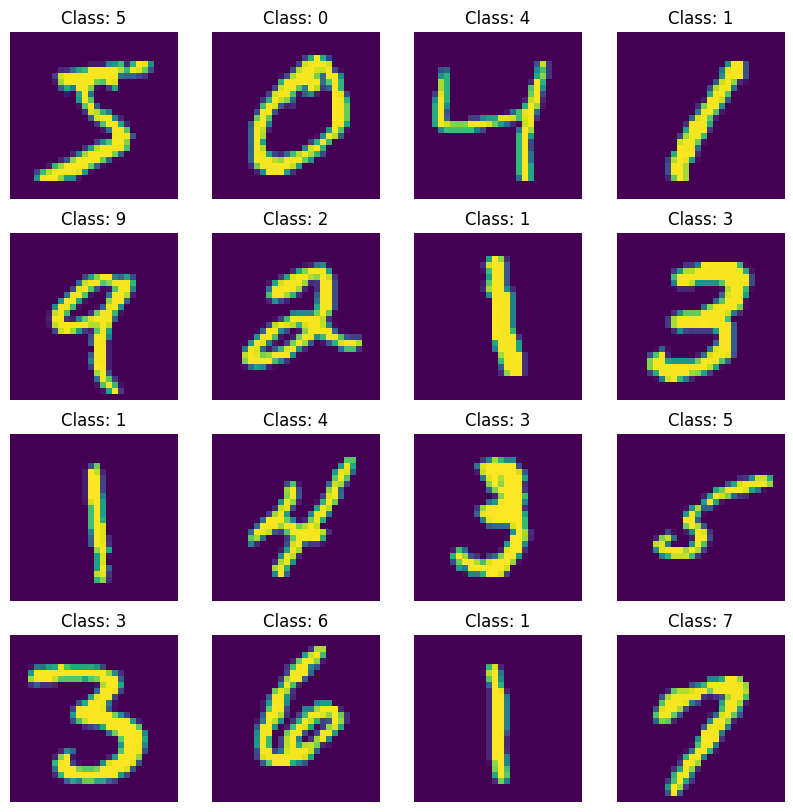

In [3]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
images, labels = X_train[:16], y_train[:16]
plt.figure(figsize = (10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[labels[i]]}")
    plt.axis("off")

### 3. TensorFlow 라이브러리를 이용해 다층 퍼셉트론 모델 구현하기




In [4]:
model = tf.keras.models.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(600, activation = 'relu'),
    Dense(500, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

### 4. 손실 함수와 경사하강법을 설정하고 모델 학습하기




In [5]:
# 손실 함수와 경사하강법에 사용될 함수를 정의한다.
# 어떤 함수를 사용할 것인지 직접 선언해주어야 하나, 텐서플로 라이브러리 내에 구현되어 있다.
# 모델 구성이 완료되면, 모델을 컴파일하고, 완성된 모델의 형태를 요약 확인 가능하다.
loss = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate = 0.0001)
model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 600)               471000    
                                                                 
 dense_1 (Dense)             (None, 500)               300500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 776510 (2.96 MB)
Trainable params: 776510 (2.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. 선언한 모델과 학습 데이터를 바탕으로 학습하기




In [6]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 5.8698 - accuracy: 0.7984 - val_loss: 2.8886 - val_accuracy: 0.8761
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 2.2555 - accuracy: 0.8926 - val_loss: 2.1823 - val_accuracy: 0.8969
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 1.6037 - accuracy: 0.9117 - val_loss: 1.8215 - val_accuracy: 0.9040
Epoch 4/50
469/469 [==============================] - 3s 5ms/step - loss: 1.2356 - accuracy: 0.9251 - val_loss: 1.5757 - val_accuracy: 0.9122
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 1.0015 - accuracy: 0.9341 - val_loss: 1.4497 - val_accuracy: 0.9177
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.8411 - accuracy: 0.9410 - val_loss: 1.3309 - val_accuracy: 0.9245
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.7099 - accuracy: 0.9465 - val_loss: 1.2405 - val_accuracy: 0.9259
Epoch 

### 6. 테스트 데이터를 이용해 모델 성능 평가하기




79/79 [==============================] - 0s 2ms/step
* Metrics
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.93      0.94      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.93      0.92      0.92       892
           6       0.96      0.95      0.95       958
           7       0.94      0.93      0.94      1028
           8       0.91      0.91      0.91       974
           9       0.92      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

* Confusion matrix


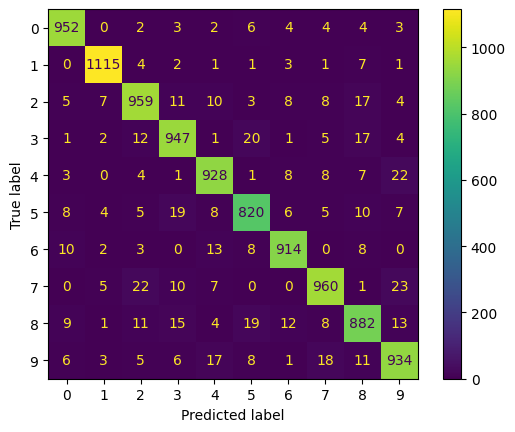

In [7]:
# 학습이 완료되었으면 테스트 데이터를 통해서 결과물을 확인한다.
# 이후 정확도와 혼동 행렬을 통해 결과를 확인한다.
y_pred = model.predict(X_test, batch_size = 128)
pred_class = np.argmax(y_pred, axis = 1)

print("* Metrics")
print(classification_report(y_test, pred_class, zero_division = 0))

print("* Confusion matrix")
cf = confusion_matrix(y_test, pred_class)
ConfusionMatrixDisplay(cf).plot()

### 7. 정확도와 손실 변화 그래프 관찰하기




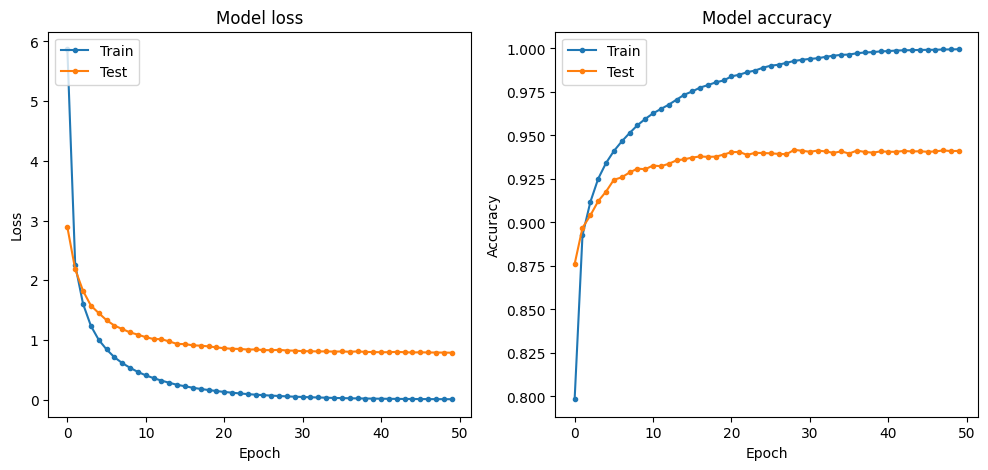

In [8]:
# 학습 과정에서 단계별 정확도와 손실 함수의 변화를 추가적으로 확인할 수 있다.
# 일반적으로 해당 그래프를 보면서 단계별 학습이 잘 이루어지고 있는지 확인이 가능하다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# 학습 및 테스트 과정 시각화(손실 함수의 값)
ax1.plot(history.history['loss'], marker = '.', label = "Train loss")
ax1.plot(history.history['val_loss'], marker = '.', label = "Valid loss")
ax1.set_title('Model loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(['Train', 'Test'], loc = 'upper left')

# 학습 및 테스트 과정 시각화(정확도)
ax2.plot(history.history['accuracy'], marker = '.', label = "Train accuracy")
ax2.plot(history.history['val_accuracy'], marker = '.', label = "Valid accuracy")
ax2.set_title('Model accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(['Train', 'Test'], loc = 'upper left')

plt.show()